#P1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving X_train.csv to X_train.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import utils

In [ ]:
def plot_reconstruction(images, title, filename):
    '''
    Plots 10%, 20%, ..., 100% reconstructions of a 28x28 image

    Args
        images (numpy.array)
            images has size (10, 28, 28)
        title (str)
            title within the image
        filename (str)
            name of the file where the image is saved

    Returns
        None

    Example usage:
        >>> images = np.zeros(10,28,28)
        >>> images[0,:,:] = x10.reshape((28,28))
        >>> images[1,:,:] = x20.reshape((28,28))
        >>> ...
        >>> images[9,:,:] = x100.reshape((28,28))
        >>> utils.plot_reconstruction(images, 'Image Title', 'filename.png')
    '''
    assert images.shape == (10,28,28)
    fig, (
        (ax0, ax1, ax2, ax3),
        (ax4, ax5, ax6, ax7),
        (ax8, ax9, _, _)
    ) = plt.subplots(3, 4)
    axes = [ax9, ax8, ax7, ax6, ax5, ax4, ax3, ax2, ax1, ax0]
    percents = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    for i in range(10):
        ax = axes[i]
        percent_name = f'{percents[i]}%' if i != 9 else 'Original'
        ax.set(title=percent_name)
        axes[i].imshow(images[i,:,:], cmap='gray')
    fig.suptitle(title)
    plt.tight_layout()
    plt.savefig(filename)

##1a

In [ ]:
file = open("X_train.csv")
numpy_array = np.loadtxt(file, delimiter=",")

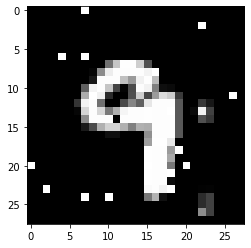

In [ ]:
arr = numpy_array[3599]
plt.imshow(arr.reshape(28, 28), cmap='gray')


##1b

In [ ]:
standardized = (numpy_array - np.mean(numpy_array, axis=0))
U, sigma, Vt = np.linalg.svd(standardized, full_matrices=True)
eigen_values = np.square(sigma)

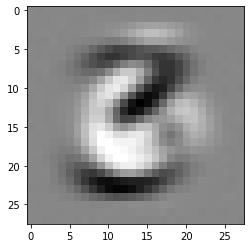

In [ ]:
plt.imshow(Vt[0].reshape(28, 28), cmap='gray')

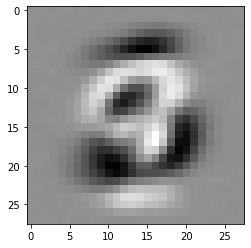

In [ ]:
plt.imshow(Vt[1].reshape(28, 28), cmap='gray')

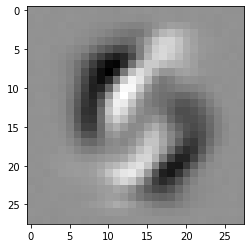

In [ ]:
plt.imshow(Vt[2].reshape(28, 28), cmap='gray')

##1c

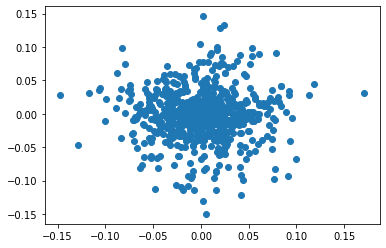

In [ ]:
x, y = Vt[:, 0], Vt[:, 1]
plt.scatter(x,y)

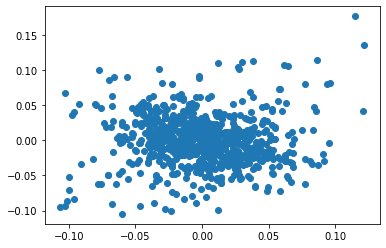

In [ ]:
x, y = Vt[:, 99], Vt[:, 100]
plt.scatter(x,y)

##1d

In [ ]:
variance_explained = []
num_used = []
for i in range(eigen_values.size):
     variance_explained.append((eigen_values[i]/sum(eigen_values))*100)
     num_used.append(i)
        
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

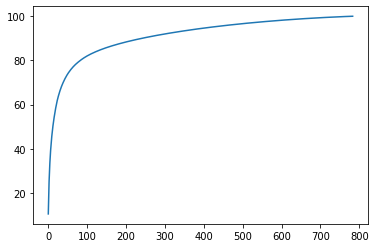

In [ ]:
plt.plot(num_used, cumulative_variance_explained)

In [ ]:
var_array = [90, 80, 70, 60, 50, 40, 30, 20, 10]
num_pc_used = []
for i in var_array:
  diff = cumulative_variance_explained - i
  diff = np.array([j if j >= 0 else max(diff) for j in diff])
  num_pc_used.append(num_used[diff.argmin() + 1])

print(num_pc_used)

[242, 84, 40, 22, 13, 8, 5, 3, 1]


##1e

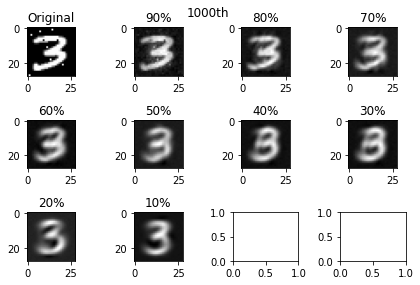

In [ ]:
#1000th
images = np.zeros((10,28,28))
images[9,:,:] = numpy_array[999].reshape((28,28))
for i in range(9):
    proj = np.diag(Vt[:num_pc_used[i]] @ numpy_array[999]) @ Vt[:num_pc_used[i]]
    images[8-i,:,:] = (np.sum(proj, axis=0) + np.mean(numpy_array, axis=0)).reshape((28,28))

plot_reconstruction(images, title="1000th", filename="1e1000")


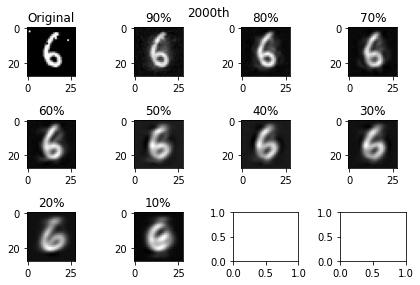

In [ ]:
#2000th
images = np.zeros((10,28,28))
images[9,:,:] = numpy_array[1999].reshape((28,28))
for i in range(9):
    proj = np.diag(Vt[:num_pc_used[i]] @ numpy_array[1999]) @ Vt[:num_pc_used[i]]
    images[8-i,:,:] = (np.sum(proj, axis=0) + np.mean(numpy_array, axis=0)).reshape((28,28))

plot_reconstruction(images, title="2000th", filename="1e2000")

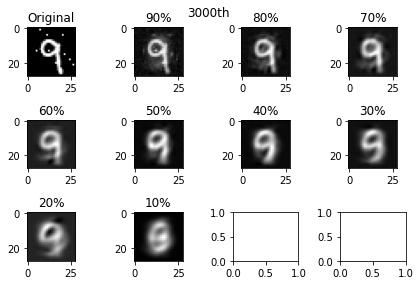

In [ ]:
#3000th
images = np.zeros((10,28,28))
images[9,:,:] = numpy_array[2999].reshape((28,28))
for i in range(9):
    proj = np.diag(Vt[:num_pc_used[i]] @ numpy_array[2999]) @ Vt[:num_pc_used[i]]
    images[8-i,:,:] = (np.sum(proj, axis=0) + np.mean(numpy_array,axis=0)).reshape((28,28))

plot_reconstruction(images, title="3000th", filename="1e3000")